In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Dataset path
project_root = r"C:\Users\tdngo\road-infra-ng"
dataset_path = os.path.join(project_root, "data", "raw", "pothole_dataset")

# Count images
normal_dir = os.path.join(dataset_path, "normal")
pothole_dir = os.path.join(dataset_path, "potholes")

normal_images = os.listdir(normal_dir)
pothole_images = os.listdir(pothole_dir)

print(f"Normal images: {len(normal_images)}")
print(f"Pothole images: {len(pothole_images)}")
print(f"Total images: {len(normal_images) + len(pothole_images)}")
print(f"Class balance: {len(pothole_images)/(len(normal_images)+len(pothole_images))*100:.1f}% potholes")


Normal images: 352
Pothole images: 329
Total images: 681
Class balance: 48.3% potholes


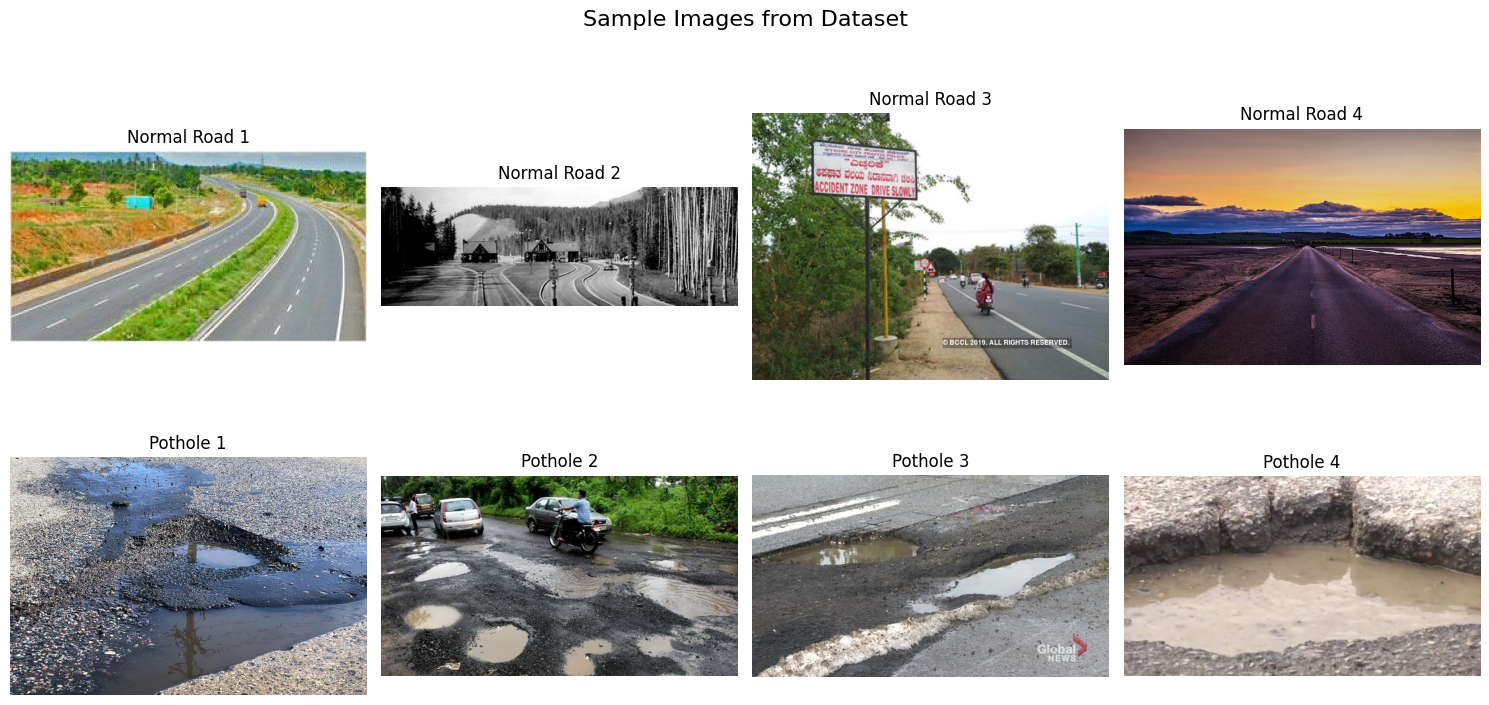

In [10]:
# Display sample images
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Sample Images from Dataset', fontsize=16)

# Show 4 normal images
for i in range(4):
    img_path = os.path.join(normal_dir, normal_images[i])
    img = Image.open(img_path)
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'Normal Road {i+1}')
    axes[0, i].axis('off')

# Show 4 pothole images
for i in range(4):
    img_path = os.path.join(pothole_dir, pothole_images[i])
    img = Image.open(img_path)
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'Pothole {i+1}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [11]:
# Check image dimensions
sample_img = Image.open(os.path.join(normal_dir, normal_images[0]))
print(f"\nSample image size: {sample_img.size}")
print(f"Sample image mode: {sample_img.mode}")


Sample image size: (280, 150)
Sample image mode: RGB


In [12]:
import os
import shutil
import random

# Paths
project_root = r"C:\Users\tdngo\road-infra-ng"
source_normal = os.path.join(project_root, "data", "raw", "pothole_dataset", "normal")
source_pothole = os.path.join(project_root, "data", "raw", "pothole_dataset", "potholes")

# Create directories
os.makedirs('data/processed/train/normal', exist_ok=True)
os.makedirs('data/processed/train/pothole', exist_ok=True)
os.makedirs('data/processed/val/normal', exist_ok=True)
os.makedirs('data/processed/val/pothole', exist_ok=True)

random.seed(42)

def split_data(source_dir, train_dir, val_dir, split=0.8):
    images = os.listdir(source_dir)
    random.shuffle(images)
    split_idx = int(len(images) * split)
    
    for img in images[:split_idx]:
        shutil.copy(os.path.join(source_dir, img), os.path.join(train_dir, img))
    
    for img in images[split_idx:]:
        shutil.copy(os.path.join(source_dir, img), os.path.join(val_dir, img))
    
    return split_idx, len(images) - split_idx

# Split both classes
train_n, val_n = split_data(source_normal, 'data/processed/train/normal', 'data/processed/val/normal')
train_p, val_p = split_data(source_pothole, 'data/processed/train/pothole', 'data/processed/val/pothole')

print(f"Training: {train_n} normal, {train_p} pothole")
print(f"Validation: {val_n} normal, {val_p} pothole")

Training: 281 normal, 263 pothole
Validation: 71 normal, 66 pothole
